# Introduction to Machine Learning - Project 3

## Shwetasree Chowdhury

## UBID - 50296995

In [644]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import regularizers
import tensorflow as tf
from keras.optimizers import RMSprop
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mplcolors
from sklearn.metrics import normalized_mutual_info_score as NMI
from keras.callbacks import EarlyStopping
from tensorflow import set_random_seed

In [645]:
class formatting:
   BOLD = '\033[1m'
   END = '\033[0m'

np.random.seed(0)

# Importing Fashion MNIST Dataset

Here we import the fashion MNIST dataset 

In [734]:
# Load the fashion-mnist pre-shuffled train data and test data
(train_data, train_label), (test_data_org, test_label) = tf.keras.datasets.fashion_mnist.load_data()
print("Train data shape:", train_data.shape, "train label shape:", train_label.shape)
print("Test data shape:", test_data_org.shape, "Test label shape:", test_label.shape)
train_data_org = train_data

Train data shape: (60000, 28, 28) train label shape: (60000,)
Test data shape: (10000, 28, 28) Test label shape: (10000,)


In [735]:
#original_data= original_data.reshape(len(original_labels),784) 
print(test_data_org.shape) 
print(train_data.dtype)
print(test_data_org.dtype)        
print(np.max(train_data))
print(np.max(test_data_org))               

(10000, 28, 28)
uint8
uint8
255
255


# Normalizing the data 

The data is normalized to make it easier for the model to learn.

In [736]:
train_data=train_data/255.0
test_data=test_data_org/255.0
train_data = train_data.reshape(-1, 28,28, 1)
test_data = test_data.reshape(-1, 28,28, 1)
train_data.shape, test_data.shape

print(train_data.shape)
print(test_data.shape) 
print(train_data.dtype)
print(test_data.dtype)        
print(np.max(train_data))
print(np.max(test_data)) 

(60000, 28, 28, 1)
(10000, 28, 28, 1)
float64
float64
1.0
1.0


# Splitting the training data into training and validation sets

The training data is split into 80% training data and 20% validation data for the model to train on

In [737]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data, 
                                                             test_size=0.2, 
                                                             random_state=0)
train_X.shape,valid_X.shape,train_ground.shape,valid_ground.shape

((48000, 28, 28, 1),
 (12000, 28, 28, 1),
 (48000, 28, 28, 1),
 (12000, 28, 28, 1))

In [738]:
def applyPCA(data,labels):
    data1 = StandardScaler().fit_transform(data)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data1)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    df = pd.DataFrame(labels)
    finalDf = pd.concat([principalDf, df], axis = 1)
    return finalDf

In [739]:
def plotPCAAnalysis(labels,finalDf,title):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = np.unique(labels)
    print(targets)
    colors = cm.Dark2(np.linspace(0,1,len(targets)))
    colors = [mplcolors.to_hex(color) for color in colors]
    print(colors)
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[0] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

# KMeans Clustering

## Running on Training Data 

In [740]:
kmeans_data= train_data.reshape(len(train_data),784) 
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_predicted_labels = kmeans.fit_predict(kmeans_data)

In [741]:
kmeans_predicted_labels.shape

(60000,)

In [742]:
unique, counts = np.unique(kmeans_predicted_labels, return_counts=True)
dict(zip(unique, counts))

{0: 9079,
 1: 2345,
 2: 7391,
 3: 4257,
 4: 7752,
 5: 6534,
 6: 9618,
 7: 7468,
 8: 2569,
 9: 2987}

In [655]:
unique1, counts1 = np.unique(train_label, return_counts=True)
dict(zip(unique1, counts1))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

## Calculating Confusion Matrix and Accuracy

In [743]:
predicted_kmean_train = kmeans_predicted_labels
results_kmean_train = confusion_matrix(train_label, predicted_kmean_train,labels=[0,1,2,3,4,5,6,7,8,9]) 
result_df_kmean_train=pd.DataFrame(results_kmean_train, index=[0,1,2,3,4,5,6,7,8,9], columns=[0,1,2,3,4,5,6,7,8,9])

labels_kmean_train = np.zeros_like(predicted_kmean_train)
for i in range(10):
    mask = (predicted_kmean_train == i)
    labels_kmean_train[mask] = mode(train_label[mask])[0]

print(formatting.BOLD + "\nAccuracy: " + formatting.END,accuracy_score(train_label, labels_kmean_train)*100)
print(formatting.BOLD + "Normalized Mutual Information Score: " + formatting.END,
      NMI(train_label, predicted_kmean_train,average_method="arithmetic")*100)

results_kmean_train = confusion_matrix(train_label, labels_kmean_train,labels=[0,1,2,3,4,5,6,7,8,9]) 
result_df_kmean_train=pd.DataFrame(results_kmean_train, index=[0,1,2,3,4,5,6,7,8,9], columns=[0,1,2,3,4,5,6,7,8,9])
print(formatting.BOLD + "\nConfusion Matrix:" + formatting.END)
result_df_kmean_train
#print(result_df_kmean_train)



Accuracy:  55.33166666666667
Normalized Mutual Information Score:  51.16483920105648

Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9
0,3404,201,0,0,167,594,1582,2,50,0
1,236,5413,0,0,63,156,129,0,3,0
2,115,9,0,0,3519,515,1787,1,54,0
3,1684,3209,0,0,49,523,523,0,12,0
4,873,154,0,0,3596,252,1081,0,44,0
5,2,1,0,0,0,3766,29,1444,17,741
6,1053,62,0,0,1954,774,2071,6,79,1
7,0,0,0,0,0,508,0,4680,1,811
8,22,28,0,0,269,494,228,237,4650,72
9,2,2,0,0,1,170,38,164,4,5619


## Applying PCA on training data & original clusters and plotting

[0 1 2 3 4 5 6 7 8 9]
['#1b9e77', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666', '#666666']


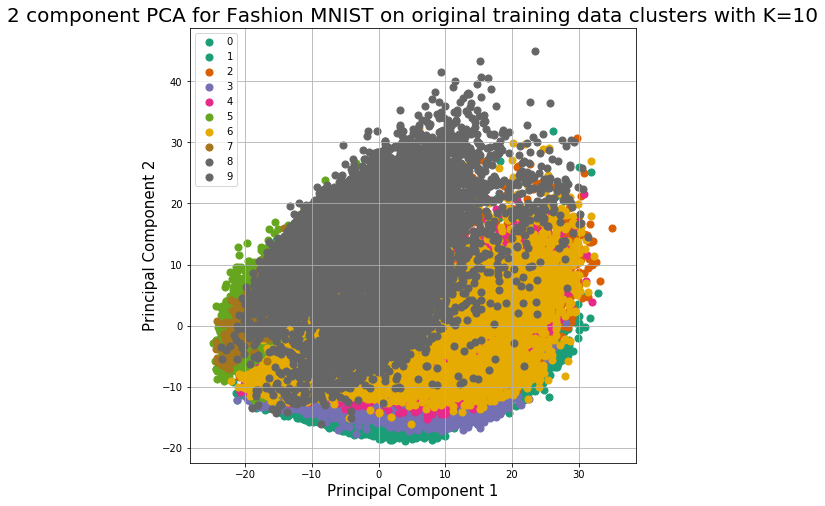

In [744]:
pca_kmean_data_train = train_data_org.reshape(len(train_data_org),784)/1.0
finalDf_kmean_train_org = applyPCA(pca_kmean_data_train,train_label)

plotPCAAnalysis(train_label,finalDf_kmean_train_org,'2 component PCA for Fashion MNIST on original training data clusters with K=10')


## Applying PCA on training data & predicted clusters and plotting 

[0 1 2 3 4 5 6 7 8 9]
['#1b9e77', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666', '#666666']


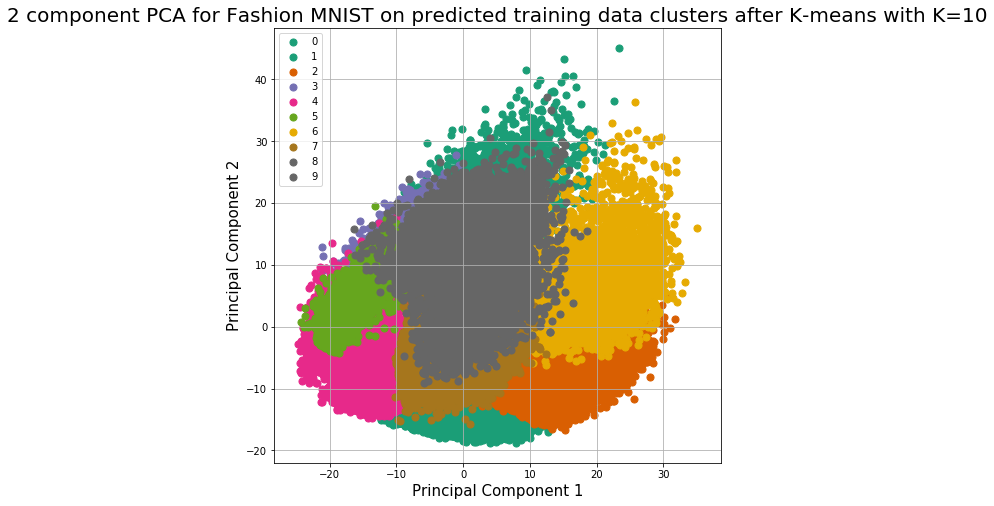

In [745]:
pca_kmean_data_train = train_data_org.reshape(len(train_data_org),784)/1.0
finalDf_kmean_train_pred = applyPCA(pca_kmean_data_train,predicted_kmean_train)
plotPCAAnalysis(predicted_kmean_train,finalDf_kmean_train_pred,
                '2 component PCA for Fashion MNIST on predicted training data clusters after K-means with K=10')

## Running on Test Data

In [746]:
kmeans_data_test= test_data.reshape(len(test_data),784) 
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_predicted_labels_test = kmeans.fit_predict(kmeans_data_test)

unique, counts = np.unique(kmeans_predicted_labels_test, return_counts=True)
dict(zip(unique, counts))

{0: 1216,
 1: 1318,
 2: 426,
 3: 1054,
 4: 1287,
 5: 754,
 6: 467,
 7: 1620,
 8: 1474,
 9: 384}

## Calculating Confusion Matrix and Accuracy

In [747]:

labels_kmean_test = np.zeros_like(kmeans_predicted_labels_test)
for i in range(10):
    mask = (kmeans_predicted_labels_test == i)
    labels_kmean_test[mask] = mode(test_label[mask])[0]

print(formatting.BOLD + "\nAccuracy: " + formatting.END,accuracy_score(test_label, labels_kmean_test)*100)
print(formatting.BOLD + "Normalized Mutual Information Score: " + formatting.END,
      NMI(test_label, kmeans_predicted_labels_test,average_method="arithmetic")*100)

results_kmean_test = confusion_matrix(test_label, labels_kmean_test,labels=[0,1,2,3,4,5,6,7,8,9]) 
result_df_kmean_test=pd.DataFrame(results_kmean_test, index=[0,1,2,3,4,5,6,7,8,9], columns=[0,1,2,3,4,5,6,7,8,9])
print(formatting.BOLD + "\nConfusion Matrix:" + formatting.END)
result_df_kmean_test
#print(result_df_kmean_test)



Accuracy:  56.03
Normalized Mutual Information Score:  51.45761149609541

Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9
0,594,29,0,0,35,80,251,1,10,0
1,52,890,0,0,9,20,29,0,0,0
2,24,4,0,0,568,49,347,0,8,0
3,276,506,0,0,9,84,120,0,5,0
4,148,27,0,0,619,39,158,0,9,0
5,0,0,0,0,0,663,6,221,0,110
6,190,12,0,0,317,108,359,0,14,0
7,0,0,0,0,0,66,0,774,0,160
8,3,6,0,0,63,78,44,35,762,9
9,0,0,0,0,0,29,4,23,2,942


## Applying PCA on test data & original clusters and plotting

[0 1 2 3 4 5 6 7 8 9]
['#1b9e77', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666', '#666666']


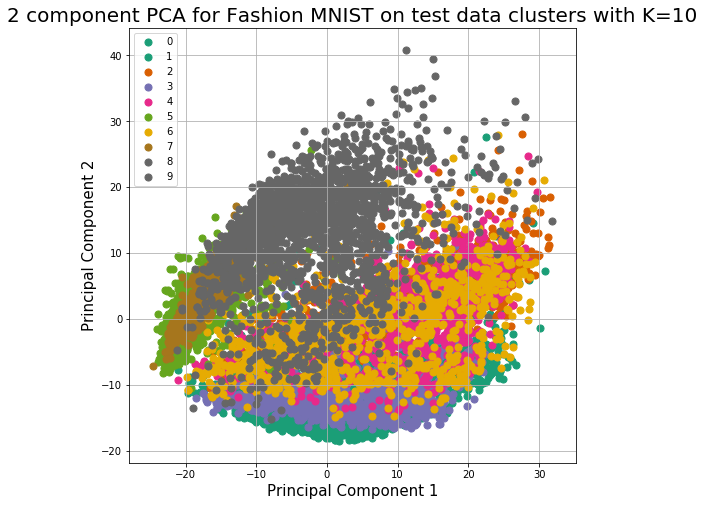

In [748]:
pca_data_kmean_test = test_data_org.reshape(len(test_data_org),784)/1.0
finalDf_kmean_test = applyPCA(pca_data_kmean_test,test_label)

plotPCAAnalysis(test_label,finalDf_kmean_test,
                '2 component PCA for Fashion MNIST on test data clusters with K=10')


## Applying PCA on test data & predicted clusters and plotting

[0 1 2 3 4 5 6 7 8 9]
['#1b9e77', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666', '#666666']


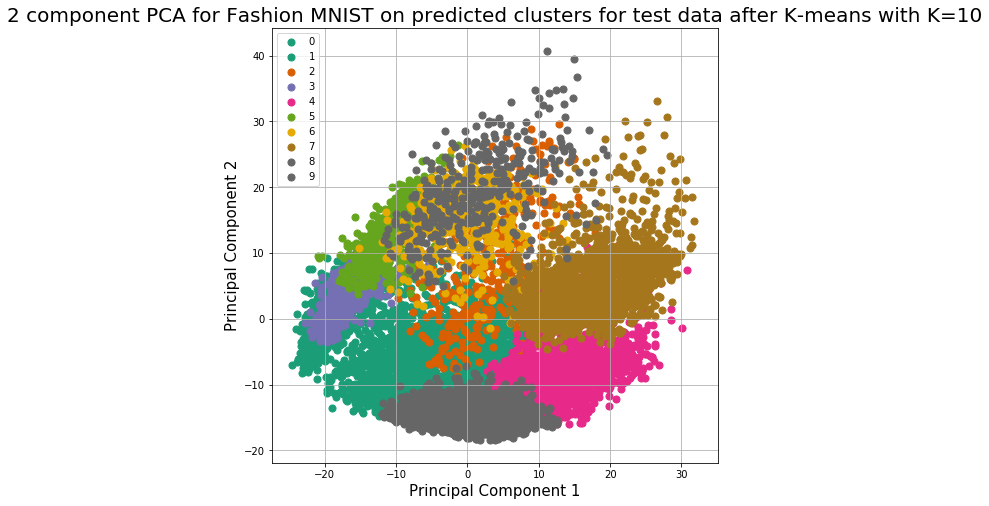

In [749]:
pca_data_kmean_test = test_data_org.reshape(len(test_data_org),784)/1.0
finalDf_kmean_test_pred = applyPCA(pca_data_kmean_test,kmeans_predicted_labels_test)

plotPCAAnalysis(kmeans_predicted_labels_test,finalDf_kmean_test_pred,
                '2 component PCA for Fashion MNIST on predicted clusters for test data after K-means with K=10')


# AutoEncoder Model

AutoEncoder model is defined here with multiple layers. 

In [863]:
def getautoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 64
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 64
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 32
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 32
    conv3 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 16 
    encoded = Conv2D(7, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 7 (small)
    conv4 = Conv2D(7, (3, 3), activation='relu', padding='same')(encoded) #7 x 7 x 7 (small)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 16
    up1 = UpSampling2D((2,2))(conv5) # 14 x 14 x 16
    conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    up2 = UpSampling2D((2,2))(conv6) # 28 x 28 x 32
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv7) # 28 x 28 x 1
    return encoded, decoded


# Training the AutoEncoder

The defined model is compiled for training with loss function taken as mean square error.

In [864]:
batch_size = 128
epochs = 10
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))

np.random.seed(0)
set_random_seed(0)

earlyPatience = 10
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=earlyPatience, mode='min')

encoder,decoder = getautoencoder(input_img)
autoencoder = Model(input_img, decoder)
autoencoder.compile(loss='mse', optimizer = 'adam', metrics=['acc'])
print(autoencoder.summary())
autoencoder_train = autoencoder.fit(train_X,
                                    train_X,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks = [earlystopping_cb], 
                                    verbose=1,
                                    validation_data=(valid_X, valid_X))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_252 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 7, 7, 7)           1015      
__________

## Plotting the training and validation accuracies and loss

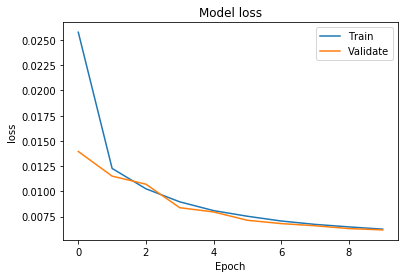

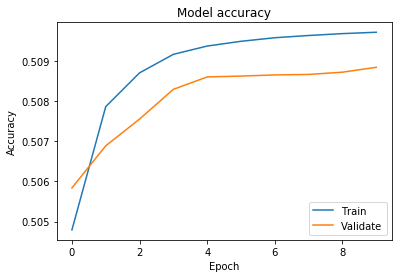

In [865]:
# Plot training & validation accuracy values
plt.plot(autoencoder_train.history['loss'])
plt.plot(autoencoder_train.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper right')
#plt.savefig('accuracy.png')
plt.show()


# Plot training & validation accuracy values
plt.plot(autoencoder_train.history['acc'])
plt.plot(autoencoder_train.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='lower right')
#plt.savefig('accuracy.png')
plt.show()

## Testing using AutoEncoder

The trained AutoEncoder is used to test on the test data and predict the images. Test accuracy and loss are repoerted and some images from the test data are compared to the predicted images.

In [866]:
score = autoencoder.evaluate(test_data, test_data)
pred = autoencoder.predict(test_data)

10000/10000 [==============================] - 2s 179us/step


In [867]:
print(formatting.BOLD + "\nAutoencoder accuracy for training set: " + formatting.END,
      autoencoder_train.history['acc'][len(autoencoder_train.history['acc'])-1] * 100)

print(formatting.BOLD + "Autoencoderloss for training set: " + formatting.END,
      autoencoder_train.history['loss'][len(autoencoder_train.history['loss'])-1])

print(formatting.BOLD + "Autoencoder accuracy for validation set: " + formatting.END,
      autoencoder_train.history['val_acc'][len(autoencoder_train.history['val_acc'])-1] * 100)

print(formatting.BOLD + "Autoencoder loss for validation set: " + formatting.END,
      autoencoder_train.history['val_loss'][len(autoencoder_train.history['val_loss'])-1])

print(formatting.BOLD + "Autoencoder accuracy for Test set:" + formatting.END,score[1]*100)
print(formatting.BOLD + "Autoencoder loss for Test set:" + formatting.END,score[0])


Autoencoder accuracy for training set:  50.97195203304291
Autoencoderloss for training set:  0.006251626425733169
Autoencoder accuracy for validation set:  50.88459819157918
Autoencoder loss for validation set:  0.006175188605984052
Autoencoder accuracy for Test set: 50.736428575515745
Autoencoder loss for Test set: 0.006211315344274044


## Plotting the original and reconstructed images of the test data

Here the images from the test data are compared with the predicted images and it is seen that the images have been reconstructed pretty well.

Test Images


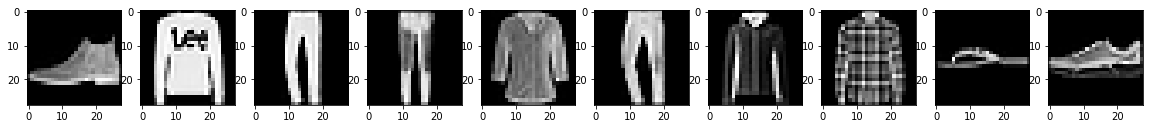

Reconstruction of Test Images


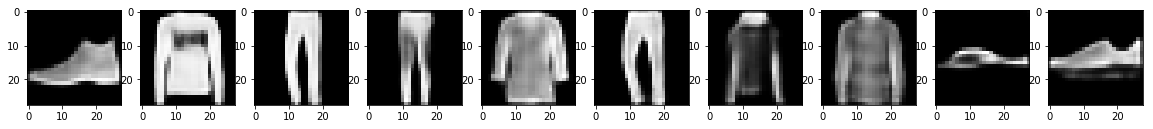

In [868]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0], cmap='gray')
    curr_lbl = test_label[i]
    #plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [869]:
autoencoder.layers

## Extracting the trained Encoder from the AutoEncoder Network

Here we extract the encoder part of the autoencoder network that we will use to encode our images to reduce the dimensionality. Looking at the model summary we can see that our encoder comprises of the first 5 layers of our network.

In [872]:
# Extract the encoder
#encoder = K.function([autoencoder.layers[0].input], [autoencoder.layers[5].output])
#print(encoder)
encoder_tr = Model(autoencoder.layers[0].input,autoencoder.layers[6].output)
encoder_tr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_252 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 7, 7, 7)           1015      
Total para

## Encoding the images from the test data  

In [873]:
#encoded_images = encoder([test_data])[0].reshape(-1,7*7*64)
#encoded_images = encoder([test_data])
#encoded_images = encoded_images[0].reshape(-1,7*7*7)
encoded_images = encoder_tr.predict(test_data)
encoded_images = encoded_images.reshape(-1,7*7*7)
print(encoded_images.shape)

(10000, 343)


# Applying KMeans on the Encoded Images

In [874]:
kmeans_enc = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
predictedlabels_kmeans_enc = kmeans_enc.fit_predict(encoded_images)

In [875]:
unique, counts = np.unique(predictedlabels_kmeans_enc, return_counts=True)
dict(zip(unique, counts))

{0: 715,
 1: 1774,
 2: 1359,
 3: 775,
 4: 1360,
 5: 439,
 6: 893,
 7: 505,
 8: 742,
 9: 1438}

## Calculating Confusion Matrix and Accuracy after KMeans Clustering

In [876]:


labels_kmean_enc = np.zeros_like(predictedlabels_kmeans_enc)
for i in range(10):
    mask = (predictedlabels_kmeans_enc == i)
    labels_kmean_enc[mask] = mode(test_label[mask])[0]

print(formatting.BOLD + "\nAccuracy: " + formatting.END,accuracy_score(test_label, labels_kmean_enc)*100)
print(formatting.BOLD + "Normalized Mutual Information Score: " + formatting.END,
      NMI(test_label, predictedlabels_kmeans_enc,average_method="arithmetic")*100)

results_kmean_enc = confusion_matrix(test_label, labels_kmean_enc,labels=[0,1,2,3,4,5,6,7,8,9]) 
result_df_kmean_enc=pd.DataFrame(results_kmean_enc, index=[0,1,2,3,4,5,6,7,8,9], columns=[0,1,2,3,4,5,6,7,8,9])
print(formatting.BOLD + "\nConfusion Matrix:" + formatting.END)
result_df_kmean_enc
#print(result_df_kmean_enc)
  



Accuracy:  57.220000000000006
Normalized Mutual Information Score:  56.29954289582493

Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9
0,576,13,0,107,42,1,248,2,11,0
1,2,859,0,104,12,0,22,0,1,0
2,3,1,0,17,614,0,344,0,21,0
3,11,464,0,375,20,0,127,0,3,0
4,0,10,0,143,695,0,142,0,10,0
5,0,0,0,0,0,392,4,507,1,96
6,122,5,0,115,347,0,384,1,26,0
7,0,0,0,0,0,4,0,793,0,203
8,1,8,0,31,44,7,167,40,701,1
9,0,0,0,1,0,35,0,16,1,947


## Applying PCA and plotting the test data after Kmeans clustering

[0 1 2 3 4 5 6 7 8 9]
['#1b9e77', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666', '#666666']


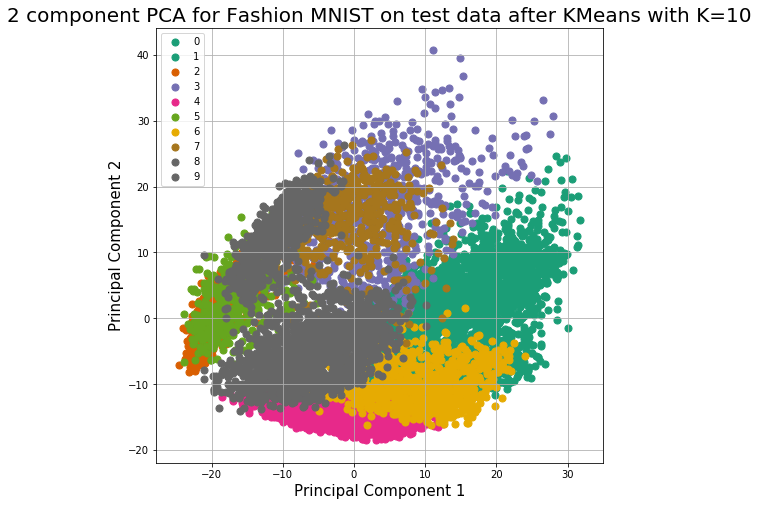

In [877]:
test_data_pca_kmean_enc=test_data_org.reshape(len(test_data_org),784)/1.0

finalDf_enc_kmean = applyPCA(test_data_pca_kmean_enc,predictedlabels_kmeans_enc)

plotPCAAnalysis(predictedlabels_kmeans_enc,finalDf_enc_kmean,
                '2 component PCA for Fashion MNIST on test data after KMeans with K=10')


# Applying GMM on the Encoded Images

In [878]:
from sklearn.mixture import GaussianMixture

In [879]:
gmm = GaussianMixture(n_components=10,max_iter=100,n_init=10,random_state=3).fit(encoded_images)
labels_gmm = gmm.predict(encoded_images)

In [880]:
unique_gmm, counts_gmm = np.unique(labels_gmm, return_counts=True)
dict(zip(unique_gmm, counts_gmm))

{0: 936,
 1: 809,
 2: 2299,
 3: 1362,
 4: 1376,
 5: 478,
 6: 679,
 7: 765,
 8: 862,
 9: 434}

## Calculating Confusion Matrix and Accuracy after applying GMM Clustering 

In [861]:

labels_gmm_enc = np.zeros_like(labels_gmm)
for i in range(10):
    mask = (labels_gmm == i)
    labels_gmm_enc[mask] = mode(test_label[mask])[0]

print(formatting.BOLD + "\nAccuracy: " + formatting.END,accuracy_score(test_label, labels_gmm_enc)*100)
print(formatting.BOLD + "Normalized Mutual Information Score: " + formatting.END,
      NMI(test_label, labels_gmm,average_method="arithmetic")*100)

results_gmm_enc = confusion_matrix(test_label, labels_gmm_enc,labels=[0,1,2,3,4,5,6,7,8,9]) 
result_df_gmm_enc=pd.DataFrame(results_gmm_enc, index=[0,1,2,3,4,5,6,7,8,9], columns=[0,1,2,3,4,5,6,7,8,9])
print(formatting.BOLD + "\nConfusion Matrix:" + formatting.END)
result_df_gmm_enc
#print(result_df_gmm_enc)
  





Accuracy:  59.830000000000005
Normalized Mutual Information Score:  60.24886018302886

Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9
0,736,37,46,96,0,11,0,1,73,0
1,2,902,14,71,0,2,0,0,9,0
2,7,3,921,26,0,5,0,0,38,0
3,14,467,25,437,0,5,0,0,52,0
4,0,8,759,206,0,3,0,0,24,0
5,0,0,0,0,0,330,0,514,4,152
6,183,15,579,120,0,10,0,1,92,0
7,0,0,0,0,0,0,0,769,0,231
8,1,6,15,11,0,25,0,22,915,5
9,0,1,0,1,0,6,0,17,2,973


## Applying PCA and plotting the test data after GMM clustering 

[0 1 2 3 4 5 6 7 8 9]
['#1b9e77', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666', '#666666']


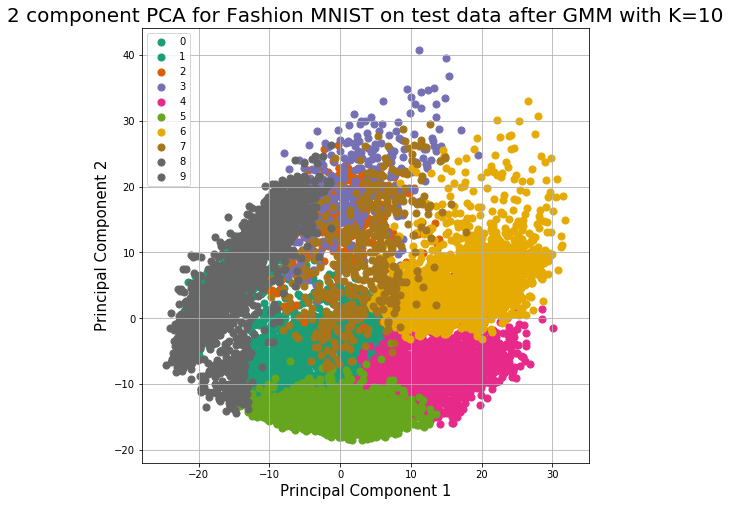

In [862]:
test_data_pca_gmm_enc=test_data_org.reshape(len(test_data_org),784)/1.0
finalDf_enc_gmm = applyPCA(test_data_pca_gmm_enc,labels_gmm)
plotPCAAnalysis(labels_gmm,finalDf_enc_kmean,'2 component PCA for Fashion MNIST on test data after GMM with K=10')